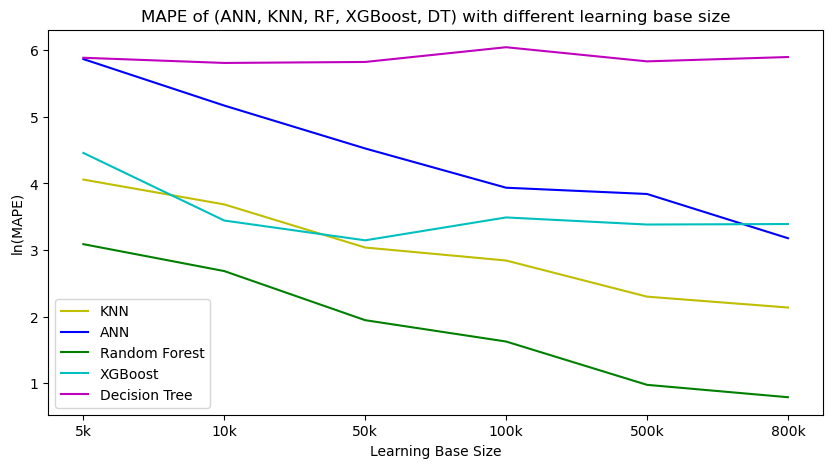

In [12]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error as MAE
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import matplotlib.font_manager as font_manager

def MAPE(actual_values, predicted_values):
    mape_sum = 0.0
    count = 0

    for actual, predicted in zip(actual_values, predicted_values):
        if actual != 0 and predicted != 0:
            mape_sum += abs((actual - predicted) / actual)
        else:
            mape_sum += abs(actual - predicted) / 100
        count += 1

    if count == 0:
        return 0  # Handle the case when there are no valid entries to avoid division by zero.

    return (mape_sum / count)[0]

# Plot the results by scaling the learning base 1k to 1M
# datasetSize = ['1k', '5k', '10k', '50k', '100k', '500k', '1M']
# randomForestMAPE = [7080, 1915, 1249, 252, 133, 29, 19]
datasetSize = ['5k', '10k', '50k', '100k', '500k', '800k']
randomForestMAPE = [21.94, 14.64, 7, 5.08, 2.65, 2.20]
annMAPE = [354, 176, 92.39, 51.23, 46.63, 23.99]
knnMAPE = [57.89, 39.86, 20.86, 17.16, 9.97, 8.47]
xgboostMAPE = [86.39, 31.29, 23.24, 32.78, 29.46, 29.69]
dtMAPE = [361, 334, 339, 423, 342, 365]

# Logarithm of MAPE
randomForestMAPE = [np.log(x) for x in randomForestMAPE]
annMAPE = [np.log(x) for x in annMAPE]
knnMAPE = [np.log(x) for x in knnMAPE]
xgboostMAPE = [np.log(x) for x in xgboostMAPE]
dtMAPE = [np.log(x) for x in dtMAPE]




# rtreeMAPE = [10913, 10913, 10913, 10913, 10913, 10913]
# Plot the results by scaling the learning base 1k to 1M
plt.figure(figsize=(10, 5))
# Highlisht the plot with exact value shown beside the plot with red color
# for i, txt in enumerate(randomForestMAPE):
#     plt.annotate(txt, (datasetSize[i], randomForestMAPE[i]))
plt.plot(datasetSize, knnMAPE, 'y', label='KNN')
plt.plot(datasetSize, annMAPE, 'b', label='ANN')
plt.plot(datasetSize, randomForestMAPE, 'g', label='Random Forest')
plt.plot(datasetSize, xgboostMAPE, 'c', label='XGBoost')
plt.plot(datasetSize, dtMAPE, 'm', label='Decision Tree')
plt.xlabel('Learning Base Size')
plt.ylabel('ln(MAPE)')
plt.title('MAPE of (ANN, KNN, RF, XGBoost, DT) with different learning base size')
plt.legend()
plt.show()


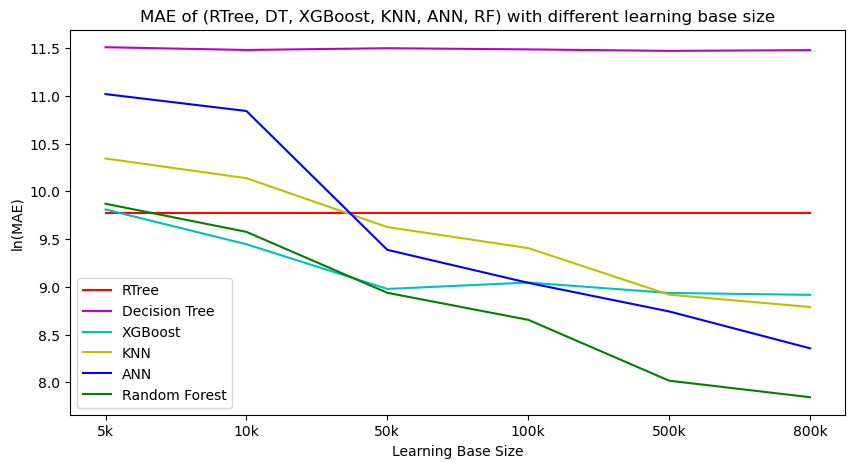

In [2]:
# Plot the results by scaling the learning base 1k to 800k (MAE)
datasetSize = ['5k', '10k', '50k', '100k', '500k', '800k']
rtreeMAE = [17585, 17585, 17585, 17585, 17585, 17585]
dtMAE = [99579, 96746, 98562, 97341, 95840, 96596]
xgboostMAE = [18212, 12662, 7929, 8478, 7603, 7452]
annMAE = [60956, 51077, 11937, 8453, 6265, 4259]
knnMAE = [31061, 25281, 15155, 12159, 7467, 6563]
randomForestMAE = [19345, 14409, 7613, 5739, 3034, 2552]

# Logarithm of MAE
rtreeMAE = [np.log(x) for x in rtreeMAE]
dtMAE = [np.log(x) for x in dtMAE]
xgboostMAE = [np.log(x) for x in xgboostMAE]
annMAE = [np.log(x) for x in annMAE]
knnMAE = [np.log(x) for x in knnMAE]
randomForestMAE = [np.log(x) for x in randomForestMAE]


plt.figure(figsize=(10, 5))
plt.plot(datasetSize, rtreeMAE, 'r', label='RTree')
plt.plot(datasetSize, dtMAE, 'm', label='Decision Tree')
plt.plot(datasetSize, xgboostMAE, 'c', label='XGBoost')
plt.plot(datasetSize, knnMAE, 'y', label='KNN')
plt.plot(datasetSize, annMAE, 'b', label='ANN')
plt.plot(datasetSize, randomForestMAE, 'g', label='Random Forest')
plt.xlabel('Learning Base Size')
plt.ylabel('ln(MAE)')
plt.title('MAE of (RTree, DT, XGBoost, KNN, ANN, RF) with different learning base size')
plt.legend()
plt.show()

In [3]:
# Load and split data to learning base and testing base (with density and without density)
from sklearn.model_selection import train_test_split
data = np.loadtxt('./intersect.filter.csv', delimiter=',')
Rectangles = data[:,0:4]
Rectangles.shape

univ_xmin = -180
univ_xmax = 180
univ_ymin = -90
univ_ymax = 90
Surface_univ=(univ_xmax-univ_xmin)*(univ_ymax-univ_ymin)

s=0
rectanglesDensity = []
for i in Rectangles:
    s = abs((i[3]-i[1])*(i[2]-i[0])/Surface_univ)
    rectanglesDensity.append(s)
rectanglesDensity = np.array(rectanglesDensity)

Y = data[:,4:5]
rectanglesDensity = rectanglesDensity.reshape(rectanglesDensity.shape[0],1)
# X = np.append(data[:,0:4], rectanglesDensity, axis=1)
X = data[:,0:4]

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

X = np.append(data[:,0:4], rectanglesDensity, axis=1)
X_train_with_density, X_test_with_density, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [4]:
# Read the model from the file
import pickle
import os

# For each file in the folder ./LearnedModels/ANN
# Load the model and predict the result :
# - MAE
# - MAPE
# - Time to predict the result
for file in os.listdir("./LearnedModels/ANN"):
    loaded_ann_model = pickle.load(open("./LearnedModels/ANN/" + file, 'rb'))

    annPredictions = loaded_ann_model.predict(X_test_with_density)
    # Set negative predictions to 0
    annPredictions[annPredictions < 0] = 0

    print(file)
    print(f"MAE: {MAE(y_test, annPredictions):.2f}")
    print(f"MAPE: {MAPE(y_test, annPredictions):.2%}")


# loaded_ann_model = pickle.load(open("./LearnedModels/ANN/mlp_999999_49360.90s_1495.92%_4720.82.sav", 'rb'))

# annPredictions = loaded_ann_model.predict(X_test_with_density)
# # Set negative predictions to 0
# annPredictions[annPredictions < 0] = 0

# print("ANN 800k")
# print(f"MAE: {MAE(y_test, annPredictions):.2f}")
# print(f"MAPE: {MAPE(y_test, annPredictions):.2%}")

mlp_withCoverageRatio_500000_22930.76s_46.63%_6265.54.sav
MAE: 6242.65
MAPE: 50.84%
mlp_withCoverageRatio_50000_1293.11s_92.39%_11937.08.sav
MAE: 11783.46
MAPE: 175.12%
mlp_withCoverageRatio_100000_1858.12s_51.23%_8453.69.sav
MAE: 8417.30
MAPE: 61.36%
mlp_withCoverageRatio_10000_137.62s_176.59%_51077.68.sav
MAE: 50969.18
MAPE: 343.96%
mlp_withCoverageRatio_800000_27182.99s_23.99%_4259.69.sav
MAE: 4251.11
MAPE: 24.69%
mlp_withCoverageRatio_1000_18.44s_261.41%_69619.10.sav
MAE: 69504.16
MAPE: 514.90%
mlp_withCoverageRatio_5000_44.33s_354.56%_60956.49.sav
MAE: 60836.64
MAPE: 559.89%


In [5]:
# Plot the results by scaling the minimum size of rectangle in test base

loaded_ann_model = pickle.load(open("./LearnedModels/ANN/mlp_withCoverageRatio_800000_27182.99s_23.99%_4259.69.sav", 'rb'))
loaded_rf_model = pickle.load(open("./LearnedModels/RF/RF_withoutCoverageRatio_800000_98.76s_2.20%_2552.67.sav", 'rb'))
loaded_knn_model = pickle.load(open("./LearnedModels/KNN/KNN_800000_1.88s_8.47%_6563.43.sav", 'rb'))


# Select test data just who have number of objects > median
median = np.median(Y)
print("Median :", median)
y_median = y_test
X_median = X_test_with_density


# Create a graph changing the minimal number of objects and display the MAE and MAPE for each minimal number of objects
# minimal_number_of_objects = 10 # 10, 100, 1000, 10000, 100000
maeRF = []
mapeRF = []
maeANN = []
mapeANN = []
maeKNN = []
mapeKNN = []
minimal_number_of_objects_range = [0, 10, 100, 1000, 5000, median, 100000, 200000, 500000]
for i in minimal_number_of_objects_range:
    minimal_number_of_objects = i
    merged_X_y = np.append(X_median, y_median, axis=1)
    merged_X_y = merged_X_y[merged_X_y[:, 5] >= minimal_number_of_objects]
    X_median = merged_X_y[:, 0:5]
    y_median = merged_X_y[:, 5:6]
    maeKNN.append(MAE(y_median, loaded_knn_model.predict(X_median)))
    mapeKNN.append(MAPE(y_median, loaded_knn_model.predict(X_median)))
    print(f"Minimal number of objects: {minimal_number_of_objects}, Mean absolute error of KNN: {maeKNN[-1]}, Mean absolute percentage error of KNN: {mapeKNN[-1]:.2%}")
    maeRF.append(MAE(y_median, loaded_rf_model.predict(X_median[:, 0:4])))
    mapeRF.append(MAPE(y_median, loaded_rf_model.predict(X_median[:, 0:4])))
    print(f"Minimal number of objects: {minimal_number_of_objects}, Mean absolute error of Random Forest: {maeRF[-1]}, Mean absolute percentage error of Random Forest: {mapeRF[-1]:.2%}")
    maeANN.append(MAE(y_median, loaded_ann_model.predict(X_median)))
    mapeANN.append(MAPE(y_median, loaded_ann_model.predict(X_median)))
    print(f"Minimal number of objects: {minimal_number_of_objects}, Mean absolute error of ANN: {maeANN[-1]}, Mean absolute percentage error of ANN: {mapeANN[-1]:.2%}")

Median : 65194.0
Minimal number of objects: 0, Mean absolute error of KNN: 6563.43372125, Mean absolute percentage error of KNN: 8.47%
Minimal number of objects: 0, Mean absolute error of Random Forest: 2552.6685684999998, Mean absolute percentage error of Random Forest: 2.20%
Minimal number of objects: 0, Mean absolute error of ANN: 4259.694318933219, Mean absolute percentage error of ANN: 23.99%
Minimal number of objects: 10, Mean absolute error of KNN: 6564.328751418956, Mean absolute percentage error of KNN: 7.55%
Minimal number of objects: 10, Mean absolute error of Random Forest: 2553.0383873995065, Mean absolute percentage error of Random Forest: 2.19%
Minimal number of objects: 10, Mean absolute error of ANN: 4259.959684895266, Mean absolute percentage error of ANN: 17.79%
Minimal number of objects: 100, Mean absolute error of KNN: 6569.50580179071, Mean absolute percentage error of KNN: 7.13%
Minimal number of objects: 100, Mean absolute error of Random Forest: 2555.1032507711

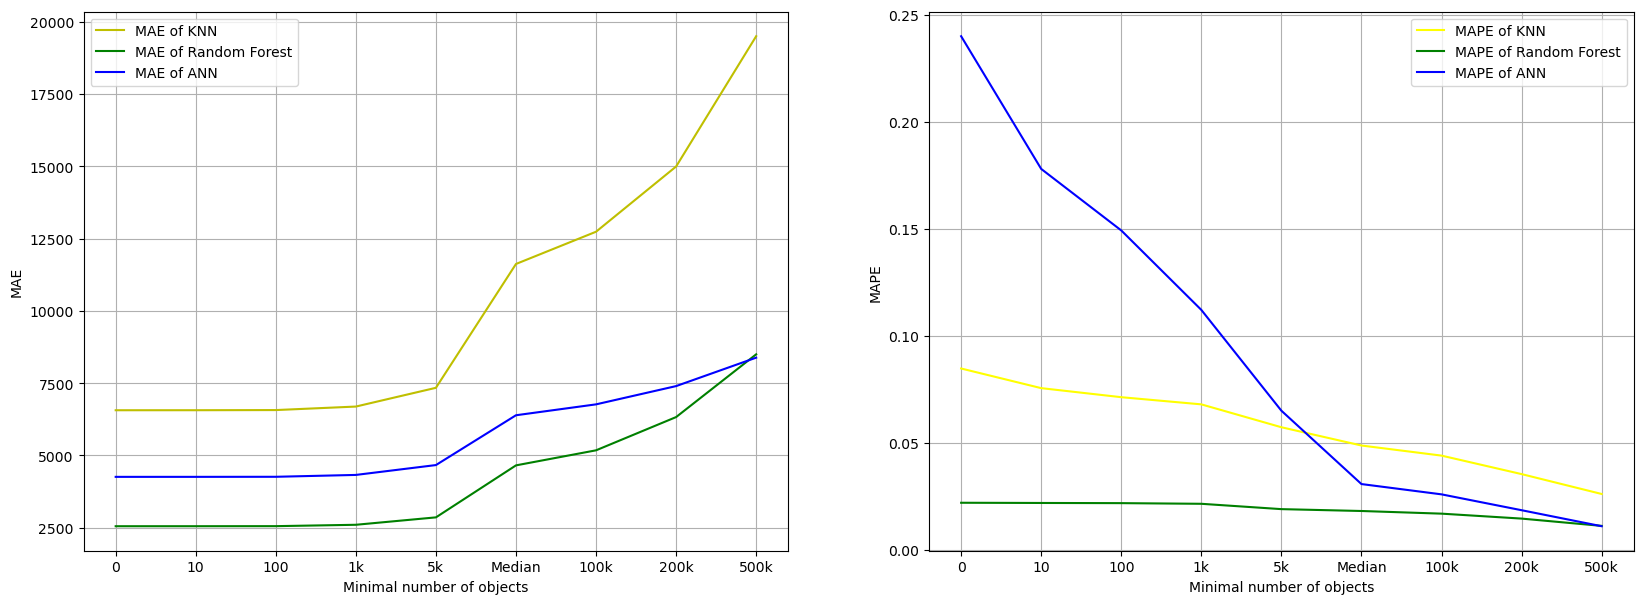

In [6]:
minimal_number_of_objects_range_str = ['0', '10', '100', '1k', '5k', 'Median', '100k', '200k', '500k',]
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(minimal_number_of_objects_range_str, maeKNN, c='y', label='MAE of KNN')
plt.plot(minimal_number_of_objects_range_str, maeRF, c='g', label='MAE of Random Forest')
plt.plot(minimal_number_of_objects_range_str, maeANN, c='b', label='MAE of ANN')
plt.xlabel('Minimal number of objects')
plt.ylabel('MAE')
plt.legend()
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(minimal_number_of_objects_range_str, mapeKNN, c='yellow', label='MAPE of KNN')
plt.plot(minimal_number_of_objects_range_str, mapeRF, c='green', label='MAPE of Random Forest')
plt.plot(minimal_number_of_objects_range_str, mapeANN, c='blue', label='MAPE of ANN')
plt.xlabel('Minimal number of objects')
plt.ylabel('MAPE')
plt.legend()
plt.grid()
plt.show()

In [7]:
# Time to predict calculated 10 times and the average is calculated
import psutil
from time import process_time

total_duration = 0
total_read = 0
total_write = 0
for i in range(10):
    io_before = psutil.disk_io_counters()
    t1_start = process_time()
    y_pred_tmp = loaded_ann_model.predict(X_test_with_density)
    t1_stop = process_time()
    io_after = psutil.disk_io_counters()
    total_duration += (t1_stop-t1_start)
    total_read += io_after.read_count - io_before.read_count
    total_write += io_after.write_count - io_before.write_count

print(f"I/O Operations (mean of 10 times) - Reads: {total_read/10}, Writes: {total_write/10}")
print("Elapsed time during one estimation in seconds (mean of 10 times):", (total_duration/10)/len(y_pred_tmp))
print("Elapsed time during one estimation in microseconds (mean of 10 times):", (total_duration/10)/len(y_pred_tmp)*1000000)
len(y_pred_tmp)

I/O Operations (mean of 10 times) - Reads: 0.2, Writes: 8.0
Elapsed time during one estimation in seconds (mean of 10 times): 3.806433960200002e-05
Elapsed time during one estimation in microseconds (mean of 10 times): 38.06433960200002


200000

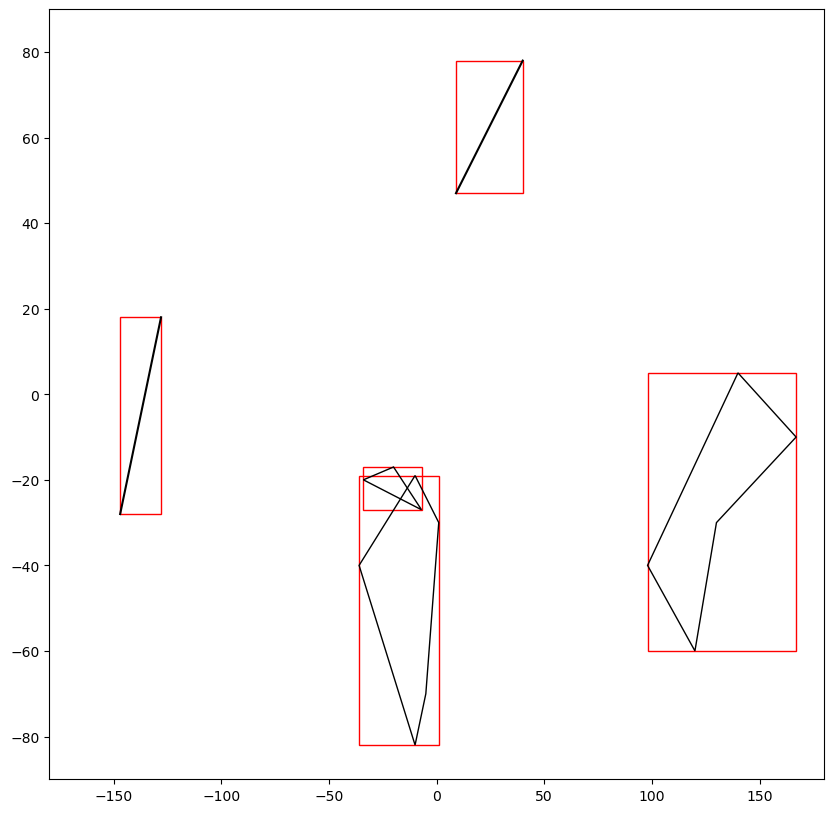

In [8]:
bbox_examples = [
    (98, -60, 167, 5),
    # (105, 9, 171, 5),
    (9, 47, 40, 78),
    # (132, -12, 147, 21),
    (-34, -27, -7, -17),
    (-147, -28, -128, 18),
    (-36, -82, 1, -19), 
]



# plot the minimal bounding boxes
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for bbox in bbox_examples:
    ax.add_patch(patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], fill=False, edgecolor='red'))
    ax.set_xlim(-180, 180)
    ax.set_ylim(-90, 90)

# plot polygon
ax.add_patch(patches.Polygon([(98, -40), (120, -60), (130, -30), (167, -10), (140, 5)], fill=False, edgecolor='black'))
ax.add_patch(patches.Polygon([(-36, -40), (-10, -82), (-5, -70), (1, -30), (-10, -19)], fill=False, edgecolor='black'))
ax.add_patch(patches.Polygon([(-34, -20), (-7, -27), (-20, -17)], fill=False, edgecolor='black'))
# plot line from (9, 47) to (40, 78)
ax.plot([9, 40], [47, 78], 'k-')
ax.plot([-147, -128], [-28, 18], 'k-')


plt.show()


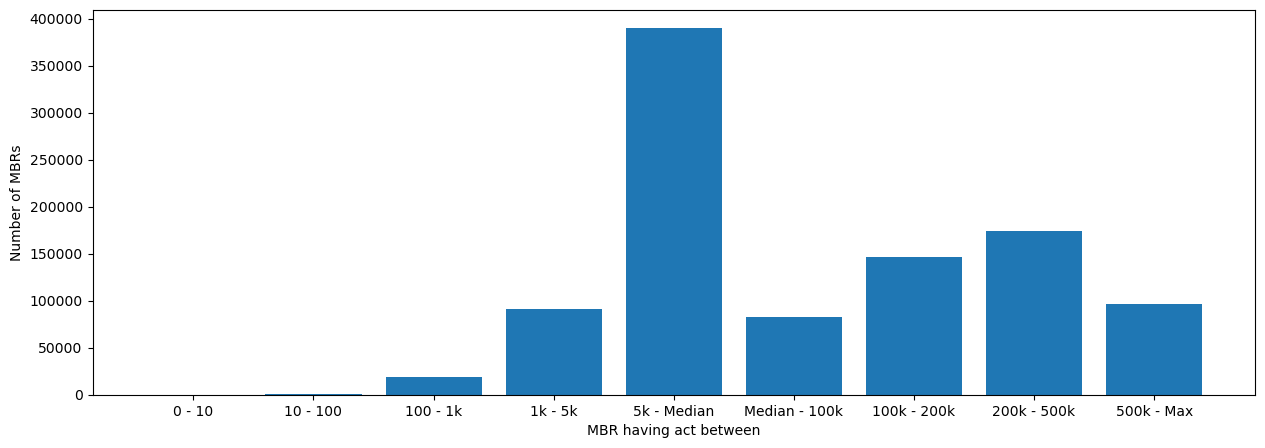

In [9]:
# Histogram of rectangles with minimal number of objects
data = np.loadtxt('./intersect.filter.csv', delimiter=',')
minimal_number_of_objects_range_str = ['0 - 10', '10 - 100', '100 - 1k', '1k - 5k', '5k - Median', 'Median - 100k', '100k - 200k', '200k - 500k', '500k - Max',]
minimal_number_of_objects_range = [0, 10, 100, 1000, 5000, median, 100000, 200000, 500000, 1683002]
results = []

# Create histogram of rectangles having sum of objects between 0 and 10 and 10 and 100 ...
plt.figure(figsize=(15, 5))
for i in range(len(minimal_number_of_objects_range)-1):
    minimal_number_of_objects = minimal_number_of_objects_range[i]
    max_number_of_objects = minimal_number_of_objects_range[i+1]
    results.append(np.sum((data[:, 4] >= minimal_number_of_objects) & (data[:, 4] < max_number_of_objects)))
    # Sum of number objects (y_median) between 0 and 10, 10 and 100, 100 and 1000, 1000 and 10000, 10000 and 100000, 100000 and 1000000
    # results.append(np.sum(y_median))

# Plot the histogram with color green
# plt.bar(minimal_number_of_objects_range_str, results, color='green')
plt.bar(minimal_number_of_objects_range_str, results)
plt.xlabel('MBR having act between')
plt.ylabel('Number of MBRs')
plt.show()


In [10]:
# Create a graph changing the minimal number of objects and display the MAE and MAPE for each minimal number of objects
# minimal_number_of_objects = 10 # 10, 100, 1000, 10000, 100000
minimal_number_of_objects_range_str = ['0 - 10', '10 - 100', '100 - 1k', '1k - 5k', '5k - Median', 'Median - 100k', '100k - 200k', '200k - 500k', '500k - Max',]
y_median = y_test
X_median = X_test_with_density

maeRF = []
mapeRF = []
maeANN = []
mapeANN = []
maeKNN = []
mapeKNN = []
minimal_number_of_objects_range = [0, 10, 100, 1000, 5000, median, 100000, 200000, 500000, 1660201]
for i in range(len(minimal_number_of_objects_range)-1):
    y_median = y_test
    X_median = X_test_with_density
    minimal_number_of_objects = i
    merged_X_y = np.append(X_median, y_median, axis=1)
    merged_X_y = merged_X_y[(merged_X_y[:, 5] >= minimal_number_of_objects_range[i]) & (merged_X_y[:, 5] < minimal_number_of_objects_range[i+1])]
    print("i+1 : ", i+1)
    X_median = merged_X_y[:, 0:5]
    y_median = merged_X_y[:, 5:6]
    maeKNN.append(MAE(y_median, loaded_knn_model.predict(X_median)))
    mapeKNN.append(MAPE(y_median, loaded_knn_model.predict(X_median)))
    print(f"Minimal number of objects: {minimal_number_of_objects}, Mean absolute error of KNN: {maeKNN[-1]}, Mean absolute percentage error of KNN: {mapeKNN[-1]:.2%}")
    maeRF.append(MAE(y_median, loaded_rf_model.predict(X_median[:, 0:4])))
    mapeRF.append(MAPE(y_median, loaded_rf_model.predict(X_median[:, 0:4])))
    print(f"Minimal number of objects: {minimal_number_of_objects}, Mean absolute error of Random Forest: {maeRF[-1]}, Mean absolute percentage error of Random Forest: {mapeRF[-1]:.2%}")
    maeANN.append(MAE(y_median, loaded_ann_model.predict(X_median)))
    mapeANN.append(MAPE(y_median, loaded_ann_model.predict(X_median)))
    print(f"Minimal number of objects: {minimal_number_of_objects}, Mean absolute error of ANN: {maeANN[-1]}, Mean absolute percentage error of ANN: {mapeANN[-1]:.2%}")


i+1 :  1
Minimal number of objects: 0, Mean absolute error of KNN: 391.7068965517241, Mean absolute percentage error of KNN: 6331.15%
Minimal number of objects: 0, Mean absolute error of Random Forest: 2.563218390804597, Mean absolute percentage error of Random Forest: 69.13%
Minimal number of objects: 0, Mean absolute error of ANN: 2429.8496018119436, Mean absolute percentage error of ANN: 42750.05%
i+1 :  2
Minimal number of objects: 1, Mean absolute error of KNN: 179.01234567901236, Mean absolute percentage error of KNN: 529.23%
Minimal number of objects: 1, Mean absolute error of Random Forest: 6.258847736625514, Mean absolute percentage error of Random Forest: 12.14%
Minimal number of objects: 1, Mean absolute error of ANN: 1432.0005650289004, Mean absolute percentage error of ANN: 3560.79%
i+1 :  3
Minimal number of objects: 2, Mean absolute error of KNN: 96.2720068027211, Mean absolute percentage error of KNN: 25.00%
Minimal number of objects: 2, Mean absolute error of Random Fo

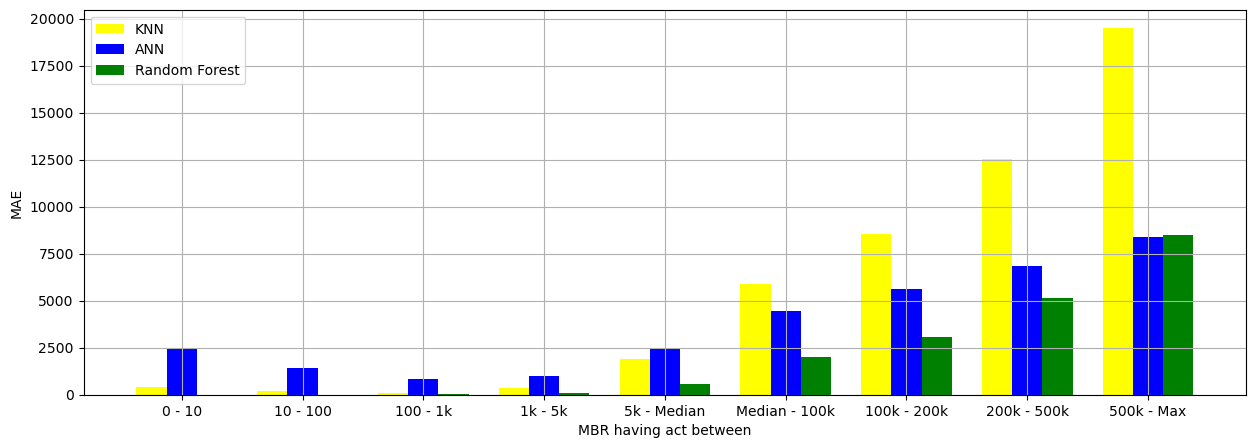

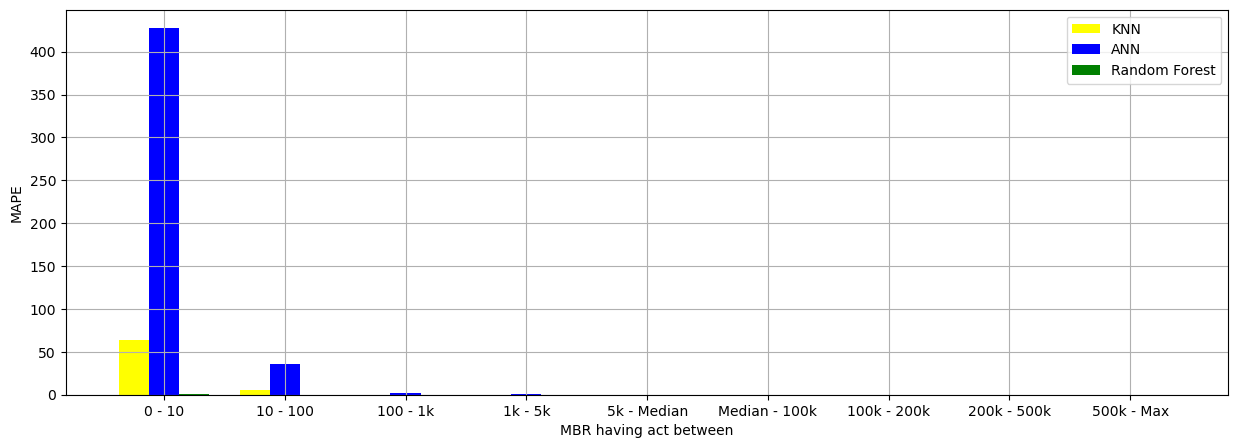

In [11]:
import numpy as np
# Histogram of MAE

# Set the bar width
bar_width = 0.25

# Set the x positions of the bars
x = np.arange(len(minimal_number_of_objects_range_str))

# Plot the bar chart for MAE
plt.figure(figsize=(15, 5))
plt.bar(x - bar_width, maeKNN, width=bar_width, color='yellow', label='KNN')
plt.bar(x, maeANN, width=bar_width, color='blue', label='ANN')
plt.bar(x + bar_width, maeRF, width=bar_width, color='green', label='Random Forest')
plt.xlabel('MBR having act between')
plt.ylabel('MAE')
plt.xticks(x, minimal_number_of_objects_range_str)
plt.legend()
plt.grid()
plt.show()

# Plot the bar chart for MAPE
plt.figure(figsize=(15, 5))
plt.bar(x - bar_width, mapeKNN, width=bar_width, color='yellow', label='KNN')
plt.bar(x, mapeANN, width=bar_width, color='blue', label='ANN')
plt.bar(x + bar_width, mapeRF, width=bar_width, color='green', label='Random Forest')
plt.xlabel('MBR having act between')
plt.ylabel('MAPE')
plt.xticks(x, minimal_number_of_objects_range_str)
plt.legend()
plt.grid()
plt.show()